In [1]:
#_________Set file path to where the data is stored locally____ (please change to where the dataset of strored locally)_______
setwd("C:/Users/Chikz/Desktop/Wrangling Project/PHONE_DATASET/")

In [2]:
#_________Importing the required libraries_________________________________
library(tidyverse)
library(dplyr)


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.2     v dplyr   1.0.2
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Loading the individual datasets of each phone brand. 

In [3]:
samsung<-read.csv("samsung.csv")
lenovo<-read.csv("lenovo.csv")
huawei<-read.csv("huawei_og.csv")
htc<-read.csv("htc.csv")
sony<-read.csv("sony.csv")
nokia<-read.csv("nokia.csv")
xiaomi<-read.csv("xiaomi.csv")
apple <- read.csv("apple.csv")

Adding Columns of brandnames in each dataset (to make it easy for segrigation post combine)

In [4]:
samsung[,"brand" ]="samsung"
lenovo[,"brand" ]="lenovo"
huawei[,"brand" ]="huawei"
htc[,"brand" ]="htc"
sony[,"brand" ]="sony"
nokia[,"brand" ]="nokia"
xiaomi[,"brand" ]="xiaomi"
apple[,"brand"]= "apple"

A function to drop the first five cols from each dataset, reason : cols contain the unrequired links from scrapping

In [5]:
library(tidyverse)
removecs<-function(x){
  X <-select(x,-c(1,2,3,4,5))
  return(X)
}

xiaomi<-removecs(xiaomi)
samsung<-removecs(samsung)
lenovo<-removecs(lenovo)
huawei<-removecs(huawei)
nokia<-removecs(nokia)
htc<-removecs(htc)
sony<-removecs(sony)
apple <-removecs(apple)

Renaming the first column of each dataset 

In [6]:
colnames(samsung)[1]<-"href"
colnames(lenovo)[1]<-"href"
colnames(huawei)[1]<-"href"
colnames(htc)[1]<-"href"
colnames(sony)[1]<-"href"
colnames(nokia)[1]<-"href"
colnames(xiaomi)[1]<-"href"
colnames(apple)[1] <-"href"

Combinging all the dataframes to a single dataframe consisting of all the phones (using the rbind() function)

In [7]:
df <- rbind(samsung,lenovo,huawei,htc,sony,nokia,xiaomi,apple)

We keep a copy of the orignal combined df to recall in case loss of data and the count of rows in it. 

In [8]:
orignal_df = df 

In [9]:
before = nrow(df)

Removing all the rows that are not phones (may include tablets and watches)

In [10]:
df<- df[!grepl("Tab", df$model,ignore.case = TRUE),]
df<- df[!grepl("watch", df$model,ignore.case = TRUE),]
df<- df[!grepl("pad", df$model,ignore.case = TRUE),]
df<- df[!grepl("ipad", df$model,ignore.case = TRUE),]
df<- df[!grepl("iwatch", df$model,ignore.case = TRUE),]
df<- df[!grepl("ipod", df$model,ignore.case = TRUE),]

Number of rows that conisited of non-phone items

In [11]:
before - nrow(df) 

[1] 205

There were 205 non-phone items in the dataset.

Replace all the Null, unknown and empty cell with NA

In [12]:
na_codes <- function(x, ...) {
    for(y in list(...))
        x[x == y] <- NA
    x
}
df <- df %>% na_codes("", " ", "null", "unknown", "Unknown", "NA", "na", "N/a", "N/A")

In [13]:
df

,href,model,Date,network,body.dimension,Weight,sim.type,body.additionals,build,display.size,...,Colors,Price,Battery.short,Memery.shot,camera.mp.shot,screen.size.shot,screen.pixels.shot,os.shot,thinckness.shot,brand
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,https://www.gsmarena.com/samsung_l170-2219.php,Samsung L170,"2008, January. Released 2008, March",GSM / UMTS,102.3 x 45.8 x 10.7 mm (4.03 x 1.80 x 0.42 in),86 g (3.03 oz),Mini-SIM,NA,NA,"1.6 inches, 8.1 cm2 (~17.2% screen-to-body ratio)",...,Metallic Silver,About 80 EUR,880,NA,2,"1.6""",176x220 pixels,Feature phone,"86g, 10.7mm thickness",samsung
2,https://www.gsmarena.com/samsung_i5500_galaxy_5-3371.php,Samsung I5500 Galaxy 5,"2010, June. Released 2010, August",GSM / HSPA,108 x 56 x 12.3 mm (4.25 x 2.20 x 0.48 in),102 g (3.60 oz),Mini-SIM,NA,NA,"2.8 inches, 24.3 cm2 (~40.1% screen-to-body ratio)",...,Black,About 80 EUR,1200,NA,2,"2.8""",240x320 pixels,"Android 2.1, up to 2.2","102g, 12.3mm thickness",samsung
3,https://www.gsmarena.com/samsung_guru_music_2-6651.php,Samsung Guru Music 2,"2014, May. Released 2014, June",GSM,112.7 x 46.4 x 13.1 mm (4.44 x 1.83 x 0.52 in),75 g (2.65 oz),GSM 900 / 1800 - SIM 1 & SIM 2,NA,NA,"2.0 inches, 12.6 cm2 (~24.1% screen-to-body ratio)",...,White,About 20 EUR,800,NA,NA,"2.0""",128x160 pixels,Feature phone,"75g, 13.1mm thickness",samsung
4,https://www.gsmarena.com/samsung_d780_flip-1507.php,Samsung D780 flip,"2006, March",GSM,94 x 48 x 15.5 mm (3.70 x 1.89 x 0.61 in),87 g (3.07 oz),Mini-SIM,NA,NA,NA,...,NA,NA,NA,NA,2,NA,176x220 pixels,Feature phone,"87g, 15.5mm thickness",samsung
5,https://www.gsmarena.com/samsung_c270-2751.php,Samsung C270,2008. Released 2008,GSM,88.1 x 45.6 x 19.8 mm (3.47 x 1.80 x 0.78 in),74 g (2.61 oz),Mini-SIM,NA,NA,"1.5 inches, 7.3 cm2 (~18.1% screen-to-body ratio)",...,"Blue, Silver, Black, Red",About 30 EUR,750,NA,NA,"1.5""",128x128 pixels,Feature phone,"74g, 19.8mm thickness",samsung
6,https://www.gsmarena.com/samsung_z150-1444.php,Samsung Z150,"2006, February",GSM / UMTS,118 x 47 x 9.8 mm (4.65 x 1.85 x 0.39 in),77 g (2.72 oz),Mini-SIM,NA,NA,"1.9 inches, 11.4 cm2 (~20.5% screen-to-body ratio)",...,Black,NA,900,NA,0.3,"1.9""","176x220 pixels, 1.9 inch",Feature phone,"77g, 9.8mm thickness",samsung
7,https://www.gsmarena.com/samsung_b5702-2702.php,Samsung B5702,"2009, February. Released 2009, June",GSM,106 x 52.5 x 16.9 mm (4.17 x 2.07 x 0.67 in),120 g (4.23 oz),GSM 850 / 900 / 1800 / 1900 - SIM 1,NA,NA,"2.4 inches, 17.8 cm2 (~32.1% screen-to-body ratio)",...,Black,About 140 EUR,1200,NA,3,"2.4""",240x320 pixels,Feature phone,"120g, 16.9mm thickness",samsung
8,https://www.gsmarena.com/samsung_b200-2359.php,Samsung B200,"2008, April. Released 2008, September",GSM,104 x 44.5 x 16 mm (4.09 x 1.75 x 0.63 in),NA,Mini-SIM,NA,NA,"1.52 inches, 7.5 cm2 (~16.1% screen-to-body ratio)",...,Silver,About 120 EUR,1000,NA,NA,"1.52""",128x128 pixels,Feature phone,16mm thickness,samsung
9,https://www.gsmarena.com/samsung_u450_doubletake-3440.php,Samsung U450 DoubleTake,"2009, July. Released 2009, July",CDMA / CDMA2000,108 x 53 x 17 mm (4.25 x 2.09 x 0.67 in),100 g (3.53 oz),Mini-SIM,NA,NA,"2.1 inches, 13.9 cm2 (~24.2% screen-to-body ratio)",...,"Black, Red",About 50 EUR,960,NA,1.3,"2.1""",176x220 pixels,Feature phone,"100g, 17mm thickness",samsung


1. Processing Display Type, Size and Resolution

In [14]:
head(df[10:12],5)

,display.size,display.type,display.resolution
,<chr>,<chr>,<chr>
1,"1.6 inches, 8.1 cm2 (~17.2% screen-to-body ratio)","TFT, 256K colors",176 x 220 pixels (~176 ppi density)
2,"2.8 inches, 24.3 cm2 (~40.1% screen-to-body ratio)","TFT capacitive touchscreen, 16M colors","240 x 320 pixels, 4:3 ratio (~143 ppi density)"
3,"2.0 inches, 12.6 cm2 (~24.1% screen-to-body ratio)","TFT, 65K colors",128 x 160 pixels (~102 ppi density)
4,NA,"TFT, 65K colors",176 x 220 pixels
5,"1.5 inches, 7.3 cm2 (~18.1% screen-to-body ratio)","CSTN, 65K colors","128 x 128 pixels, 1:1 ratio (~121 ppi density)"


we would like to extract usefull information by segregrating these strings into multiple cols and data types.

In [15]:
#b.	First we create a sub-dataset that segregates these three cols from the rest of the df we call it “part” 
part<-select(df, c(model,display.size,display.type, display.resolution))
  
#We split the display type and take the first element i.e. disply type and drop the colors (not all phone have colors defined)
part<-separate(part, display.type, c("display.type","dropme"),",")
head(part[3],3)

Warning message:
"Expected 2 pieces. Additional pieces discarded in 27 rows [1412, 1457, 1490, 1510, 1511, 1513, 1516, 1527, 1533, 1538, 1577, 1594, 1627, 1628, 1633, 1636, 1638, 1655, 1660, 1661, ...]."
Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 372 rows [92, 133, 204, 225, 231, 233, 257, 293, 297, 387, 412, 435, 456, 462, 496, 501, 512, 543, 579, 595, ...]."


,display.type
,<chr>
1,TFT
2,TFT capacitive touchscreen
3,TFT


In [16]:
#We split to extract the display size and the ratio
part<-separate(part, display.size, c("display.size","displayratio"),",")
part$display.size<-str_extract(part$display.size, "\\d+\\.*\\d*")
head(part[2:3],3)


Warning message:
"Expected 2 pieces. Additional pieces discarded in 125 rows [15, 46, 68, 82, 105, 110, 113, 119, 151, 159, 207, 217, 218, 267, 331, 398, 413, 442, 443, 467, ...]."
Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [1237]."


,display.size,displayratio
,<chr>,<chr>
1,1.6,8.1 cm2 (~17.2% screen-to-body ratio)
2,2.8,24.3 cm2 (~40.1% screen-to-body ratio)
3,2.0,12.6 cm2 (~24.1% screen-to-body ratio)


In [17]:
#We extract the resolution and the pixel density
part<-separate(part, display.resolution, c("pixels","pixel_density"),"p")
part$pixels<-gsub("^\\s+|\\s+$","",part$pixels)#trim spaces
head(part[6:7],3)

Warning message:
"Expected 2 pieces. Additional pieces discarded in 2101 rows [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...]."
Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 22 rows [133, 1669, 1746, 1781, 1795, 1810, 1847, 1899, 1922, 1965, 1971, 1998, 2026, 2054, 2077, 2081, 2084, 2091, 2126, 2139, ...]."


,pixels,pixel_density
,<chr>,<chr>
1,176 x 220,ixels (~176
2,240 x 320,"ixels, 4:3 ratio (~143"
3,128 x 160,ixels (~102


In [18]:
#extract pixel_density from displayratio
part$device_length<-str_extract(part$displayratio, "\\d+\\.*\\d*")
part<-separate(part, pixel_density, c("dropme2","pixel_density"),"~")
head(part[8],3)

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 181 rows [4, 24, 28, 33, 34, 45, 47, 52, 67, 92, 103, 104, 131, 158, 162, 171, 178, 184, 185, 204, ...]."


,pixel_density
,<chr>
1,176
2,143
3,102


In [19]:
#split and extract the screen ratio and the drop all the cols with the excess strings 
part<-separate(part, displayratio, c("dropme3","screen_ratio"),"~")
part$screen_ratio<-str_extract(part$screen_ratio, "\\d+\\.*\\d*")
part<-select(part,-c(dropme,dropme2,dropme3))

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 174 rows [15, 46, 49, 59, 68, 82, 105, 110, 113, 119, 151, 153, 159, 207, 217, 218, 259, 267, 326, 331, ...]."


In [20]:
#the final product 
head(part,5)

,model,display.size,screen_ratio,display.type,pixels,pixel_density,device_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Samsung L170,1.6,17.2,TFT,176 x 220,176,8.1
2,Samsung I5500 Galaxy 5,2.8,40.1,TFT capacitive touchscreen,240 x 320,143,24.3
3,Samsung Guru Music 2,2.0,24.1,TFT,128 x 160,102,12.6
4,Samsung D780 flip,NA,NA,TFT,176 x 220,NA,NA
5,Samsung C270,1.5,18.1,CSTN,128 x 128,121,7.3


In [21]:
#we join te part dataframe back to the main datafame 
df <- df %>%inner_join(part, by = "model") 

2. We will be working on cleaning the Price col

In [22]:
head(df['Price'],10)

,Price
,<chr>
1,About 80 EUR
2,About 80 EUR
3,About 20 EUR
4,NA
5,About 30 EUR
6,NA
7,About 140 EUR
8,About 120 EUR
9,About 50 EUR


In [23]:
#To extract the price in an interger value we separarte the price into 3 cols. : 1. string, 2: the price int, 3: the currecny
df <- separate(df, Price, c('dropme', 'value', 'currency'), " ")
#we drow the bad data prefix that was a by-product from price split
df <- select(df,-c(dropme))

Warning message:
"Expected 3 pieces. Additional pieces discarded in 53 rows [584, 1166, 1169, 1213, 1215, 1224, 1233, 1243, 1288, 1289, 1301, 1313, 1332, 1336, 1337, 1366, 1372, 1664, 1714, 1807, ...]."
Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 11 rows [1143, 1255, 2174, 2181, 2183, 2225, 2242, 2249, 2280, 2282, 2286]."


In [24]:
head(df['value'],5)

,value
,<chr>
1,80
2,80
3,20
4,NA
5,30


In [25]:
#now replacing dirty values with NA in the currency row : dirity values can be rand punctuation like -> *.###^^///
df[!df$curreny %in% c("EUR"), "currency"] <- NA
#Many rows had a '/' instead of the currecny so we NA them. 
df$value <- gsub("/", NA, df$value)

In [26]:
#Finalm Produce
head(df[,c("value","currency")],5)

,value,currency
,<chr>,<chr>
1,80,EUR
2,80,EUR
3,20,EUR
4,NA,NA
5,30,EUR


3. Date is an important aspect as it will allow us to creat time-seares data and visuals.  

In [27]:
head(df['Date'],5)

,Date
,<chr>
1,"2008, January. Released 2008, March"
2,"2010, June. Released 2010, August"
3,"2014, May. Released 2014, June"
4,"2006, March"
5,2008. Released 2008


In [28]:
# We seperate the Date string into a Year and Month
#we use the separate() funtion to catch the year which appears before a "," and month that appears before "."
df1 <- separate(df, Date, c('year','month', 'dropme'), sep = "([\\,\\.])")

Warning message:
"Expected 3 pieces. Additional pieces discarded in 1288 rows [1, 2, 3, 7, 8, 9, 10, 12, 16, 17, 18, 20, 22, 23, 26, 28, 29, 30, 31, 32, ...]."
Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 966 rows [4, 5, 6, 11, 13, 14, 15, 19, 24, 25, 27, 33, 34, 36, 38, 43, 45, 46, 47, 49, ...]."


In [29]:
#We remove all the abnormalities that involved phone that are not released yet from months and year
df1$month <- gsub("Released", NA, df1$month)
df1$month <- gsub("Release", NA, df1$month)
df1$year <- gsub("Released", NA, df1$year)
df1$year <- gsub("Release", NA, df1$year)

#Some months are written in quaters eg: Q1, Q2 ...; we replace them with months
df1$month <- str_replace(df1$month, "Q1", "January")
df1$month <- str_replace(df1$month, "Q2", "May")
df1$month <- str_replace(df1$month, "Q3", "August")
df1$month <- str_replace(df1$month, "Q4", "November")

#we clear an cell con containing a inteager in month column
df1$month <- gsub('[[:digit:]]+', '', df1$month)

#we remove the spaces if any 
df1$month <- gsub(' ', '', df1$month)

#we remove the any possible unwated string or caption that be obstruct year or month
df1$month <- gsub("Not", NA, df1$month)
df1$month <- gsub("announced ", NA, df1$month)
df1$year <- gsub("Not", NA, df1$year)
df1$year <- gsub("announced", NA, df1$year)

#we convert the year into a numeric format for easy group_by in future
df1$year <- sapply(df1$year, as.numeric)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"N

In [30]:
head(df1[,c('year','month')],5)

,year,month
,<dbl>,<chr>
1,2008,January
2,2010,June
3,2014,May
4,2006,March
5,2008,NA


4. Now we work on the phone "Weight" col. 

In [31]:
head(df1['Weight'],5)

,Weight
,<chr>
1,86 g (3.03 oz)
2,102 g (3.60 oz)
3,75 g (2.65 oz)
4,87 g (3.07 oz)
5,74 g (2.61 oz)


In [32]:
#we clean the Weight column and extract weight in grams 
df2 <- separate(df1, Weight, c('Weight_g','dropme2'), sep = "g")

Warning message:
"Expected 2 pieces. Additional pieces discarded in 9 rows [162, 617, 651, 749, 912, 1532, 1691, 2246, 2289]."
Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 96 rows [42, 59, 61, 66, 86, 153, 187, 227, 259, 311, 326, 339, 360, 396, 448, 549, 554, 627, 680, 681, ...]."


In [33]:
#final product : Weigt_g
head(df2['Weight_g'],5)

,Weight_g
,<chr>
1,86
2,102
3,75
4,87
5,74


5. The Build col consists of three elements "Screen Material", "Back" and "Frame Material" ; these have the same order and are seperated by a ",'. So we divide them into three cols.

In [34]:
tail(df['build'],5)

,build
,<chr>
2302,"Glass front (Gorilla Glass), aluminum back, aluminum frame"
2303,"Glass front (Gorilla Glass), aluminum back, aluminum frame"
2304,"Glass front (Gorilla Glass), glass back, stainless steel frame"
2305,"Glass front (Gorilla Glass), glass back, aluminum frame"
2306,NA


In [35]:
#Now we devied te build into 3 columns a. the screen glass and b. the back and c.frame material 
df3 <- separate(df2, build, c('Screen','Back','Frame'), sep = ",")

Warning message:
"Expected 3 pieces. Additional pieces discarded in 2 rows [2248, 2268]."
Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 6 rows [14, 174, 586, 716, 1203, 1371]."


In [36]:
#Navagating cols of focus : output
tail(df3[,c('Screen','Back','Frame'),5])

,Screen,Back,Frame
,<chr>,<chr>,<chr>
2301,Glass front (Gorilla Glass),aluminum back,aluminum frame
2302,Glass front (Gorilla Glass),aluminum back,aluminum frame
2303,Glass front (Gorilla Glass),aluminum back,aluminum frame
2304,Glass front (Gorilla Glass),glass back,stainless steel frame
2305,Glass front (Gorilla Glass),glass back,aluminum frame
2306,NA,NA,NA


6. the col 'display.size.x' had 2 usefull infomration that needs to be extracted 1. screen size, 2. body to screen ratio

In [37]:
head(df['display.size.x'],5)

,display.size.x
,<chr>
1,"1.6 inches, 8.1 cm2 (~17.2% screen-to-body ratio)"
2,"2.8 inches, 24.3 cm2 (~40.1% screen-to-body ratio)"
3,"2.0 inches, 12.6 cm2 (~24.1% screen-to-body ratio)"
4,NA
5,"1.5 inches, 7.3 cm2 (~18.1% screen-to-body ratio)"


In [38]:
#screen to body ratio happes be an important aspect hence that will be extracted form display.size.x 
# current data : 1.6 inches, 8.1 cm2 (~17.2% screen-to-body ratio), element needed : 17.2%
df4 <- separate(df3, display.size.x, c('dsp_size','drop4', 'Body_to_screen_ratio', 'drop5'), sep = "([\\,\\(\\%])")

#remove the "~" sign befoe every value
df4$Body_to_screen_ratio <- gsub('~', '', df4$Body_to_screen_ratio)

#Convert to numric to eleminate all th string vaules with replace thm with NA
df4$Body_to_screen_ratio <- sapply(df4$Body_to_screen_ratio, as.numeric)

#Extract the display size  
df4 <- separate(df4, dsp_size, c('Dispaly_size_inch', 'drop_itt'), " ")

Warning message:
"Expected 4 pieces. Additional pieces discarded in 125 rows [15, 46, 68, 82, 105, 110, 113, 119, 151, 159, 207, 217, 218, 267, 331, 398, 413, 442, 443, 467, ...]."
Warning message:
"Expected 4 pieces. Missing pieces filled with `NA` in 50 rows [49, 59, 153, 259, 326, 448, 549, 710, 837, 1031, 1035, 1036, 1065, 1106, 1164, 1175, 1176, 1228, 1237, 1246, ...]."
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by 

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"
Warning message in lapply(X = X, FUN = FUN, ...):
"N

In [39]:
head(df4[,c('Dispaly_size_inch','Body_to_screen_ratio')])

,Dispaly_size_inch,Body_to_screen_ratio
,<chr>,<dbl>
1,1.6,17.2
2,2.8,40.1
3,2.0,24.1
4,NA,NA
5,1.5,18.1
6,1.9,20.5


7. We extract the OS version at lauch dropping the versions it the phone can be upgradable to

In [40]:
tail(df4['Opearting.System'],5)

,Opearting.System
,<chr>
2302,"iOS 9, upgradable to iOS 14"
2303,"iOS 8, upgradable to iOS 12.4.6"
2304,"iOS 4, upgradable to iOS 7.1.2"
2305,"iOS 5, upgradable to iOS 9.3.5"
2306,"iOS 4, upgradable to iOS 7.1.1"


In [41]:
#Extracting thr OS of the phones
df5 <- separate(df4, Opearting.System, c('OS'), sep = ",")

Warning message:
"Expected 1 pieces. Additional pieces discarded in 838 rows [2, 18, 19, 35, 36, 61, 64, 77, 78, 80, 81, 84, 90, 96, 97, 98, 101, 102, 106, 107, ...]."


In [42]:
tail(df5['OS'],5)

,OS
,<chr>
2302,iOS 9
2303,iOS 8
2304,iOS 4
2305,iOS 5
2306,iOS 4


8. Some phones have multiple camaer, but some have one; the most important one to comapare is the primary camera as it dose the all the clicking. We need to extract the Primary camera Mega Pixels and drop the rest, both for front and back. 
In the spec sheet the firt stated cam is the primary. 

In [43]:
tail(df5[,c('Camera','Front.Camera')],5)

,Camera,Front.Camera
,<chr>,<chr>
2302,"12 MP, f/2.2, 29mm (standard), 1/3"", 1.22Âµm, PDAF, OIS","5 MP, f/2.2, 31mm (standard)"
2303,"8 MP, f/2.2, 29mm (standard), 1/3"", 1.5Âµm, PDAF","1.2 MP, f/2.2, 31mm (standard)"
2304,"5 MP, f/2.8, 1/3.2"", 1.75Âµm, AF","VGA, videocalling over Wi-Fi only"
2305,"8 MP, f/2.4, 35mm (standard), 1/3.2"", 1.4Âµm, AF","VGA, videocalling over Wi-Fi and 3G"
2306,"5 MP, AF",Videocalling over Wi-Fi only


In [44]:
#The new phones can have more than 3 cameras, but the primary camera is the most important as the others may be used for
# telephoto, zoom or fish-eye view capture
df6 <- separate(df5, Camera, c('Primary_camera_MP'), sep = ",")
df6 <- separate(df6, Front.Camera, c('Front_camera_MP'), sep = ",")
df6$Primary_camera_MP <- str_extract(df6$Primary_camera_MP, '[[:digit:]]+')
df6$Front_camera_MP <- str_extract(df6$Front_camera_MP, '[[:digit:]]+')

Warning message:
"Expected 1 pieces. Additional pieces discarded in 1146 rows [1, 7, 10, 13, 17, 18, 19, 35, 36, 43, 51, 52, 53, 54, 55, 57, 59, 61, 64, 65, ...]."
Warning message:
"Expected 1 pieces. Additional pieces discarded in 340 rows [19, 35, 36, 79, 97, 101, 106, 108, 117, 123, 134, 155, 191, 192, 205, 252, 265, 270, 317, 324, ...]."


In [45]:
tail(df6[,c('Primary_camera_MP','Front_camera_MP')],5)

,Primary_camera_MP,Front_camera_MP
,<chr>,<chr>
2302,12,5
2303,8,1
2304,5,NA
2305,8,NA
2306,5,NA


9. Battery

In [46]:
#using the str_extract function to extract the battery power of all phone stored in a new col name Battery_MAH
df6$Battery_MAH <- str_extract(df6$Battery, '[[:digit:]]+')

DECLUTTERING (much needed !)

In [47]:
#We generate th
colnames(df6)

[1] "href"                       "model"                     
 [3] "year"                       "month"                     
 [5] "dropme"                     "network"                   
 [7] "body.dimension"             "Weight_g"                  
 [9] "dropme2"                    "sim.type"                  
[11] "body.additionals"           "Screen"                    
[13] "Back"                       "Frame"                     
[15] "Dispaly_size_inch"          "drop_itt"                  
[17] "drop4"                      "Body_to_screen_ratio"      
[19] "drop5"                      "display.type.x"            
[21] "display.resolution"         "display.aditionals"        
[23] "OS"                         "Chipset"                   
[25] "processor"                  "CPU"                       
[27] "GPU"                        "Memory.Card.Slot"          
[29] "Internal.Memory"            "Primary_camera_MP"         
[31] "Camera.Additional.Features" "Video.Recording"           
[33] "Front_camera_MP"            "Loudspeaker"               
[35] "X35mm.jack"                 "audio.additionals"         
[37] "WLAN"                       "Bluetooth"                 
[39] "GPS"                        "NFC"                       
[41] "Radio"                      "USB"                       
[43] "Sensors"                    "Battery"                   
[45] "Battery.Additionals"        "Colors"                    
[47] "value"                      "currency"                  
[49] "Battery.short"              "Memery.shot"               
[51] "camera.mp.shot"             "screen.size.shot"          
[53] "screen.pixels.shot"         "os.shot"                   
[55] "thinckness.shot"            "brand"                     
[57] "display.size.y"             "screen_ratio"              
[59] "display.type.y"             "pixels"                    
[61] "pixel_density"              "device_length"             
[63] "Battery_MAH"

In [48]:
df_main <- select(df6,-c('href','dropme','network','body.dimension','dropme2','sim.type','body.additionals'
                         ,'drop_itt','drop4','drop5','display.type.x','display.resolution','display.aditionals'
                         ,'Memory.Card.Slot','Camera.Additional.Features','Video.Recording'
                         ,'Loudspeaker','audio.additionals','WLAN','Bluetooth','Radio','Sensors'
                         ,'Battery','Battery.Additionals','Battery.short','Memery.shot','camera.mp.shot'
                         ,'screen.size.shot','screen.pixels.shot','os.shot','thinckness.shot','display.type.y'))

A clean dataframe ready to be using for analysis

In [49]:
df_main

model,year,month,Weight_g,Screen,Back,Frame,Dispaly_size_inch,Body_to_screen_ratio,OS,...,Colors,value,currency,brand,display.size.y,screen_ratio,pixels,pixel_density,device_length,Battery_MAH
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Samsung L170,2008,January,86,NA,NA,NA,1.6,17.2,NA,...,Metallic Silver,80,EUR,samsung,1.6,17.2,176 x 220,176,8.1,880
Samsung I5500 Galaxy 5,2010,June,102,NA,NA,NA,2.8,40.1,Android 2.1 (Eclair),...,Black,80,EUR,samsung,2.8,40.1,240 x 320,143,24.3,1200
Samsung Guru Music 2,2014,May,75,NA,NA,NA,2.0,24.1,NA,...,White,20,EUR,samsung,2.0,24.1,128 x 160,102,12.6,800
Samsung D780 flip,2006,March,87,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,samsung,NA,NA,176 x 220,NA,NA,NA
Samsung C270,2008,NA,74,NA,NA,NA,1.5,18.1,NA,...,"Blue, Silver, Black, Red",30,EUR,samsung,1.5,18.1,128 x 128,121,7.3,750
Samsung Z150,2006,February,77,NA,NA,NA,1.9,20.5,NA,...,Black,NA,NA,samsung,1.9,20.5,176 x 220,148,11.4,900
Samsung B5702,2009,February,120,NA,NA,NA,2.4,32.1,NA,...,Black,140,EUR,samsung,2.4,32.1,240 x 320,167,17.8,1200
Samsung B200,2008,April,NA,NA,NA,NA,1.52,16.1,NA,...,Silver,120,EUR,samsung,1.52,16.1,128 x 128,119,7.5,1000
Samsung U450 DoubleTake,2009,July,100,NA,NA,NA,2.1,24.2,NA,...,"Black, Red",50,EUR,samsung,2.1,24.2,176 x 220,134,13.9,960


In [50]:
#We convert to .csv and save the output copy

In [51]:
write.csv(df_main ,"C:/Users/Chikz/Desktop/Wrangling Project/PHONE_DATASET/Phone_df.csv", row.names = FALSE)

In [52]:
##Visualization

1. The screen size of phones have been drasticly increaing with time, but were they always so big ?

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 254 rows containing non-finite values (stat_smooth)."


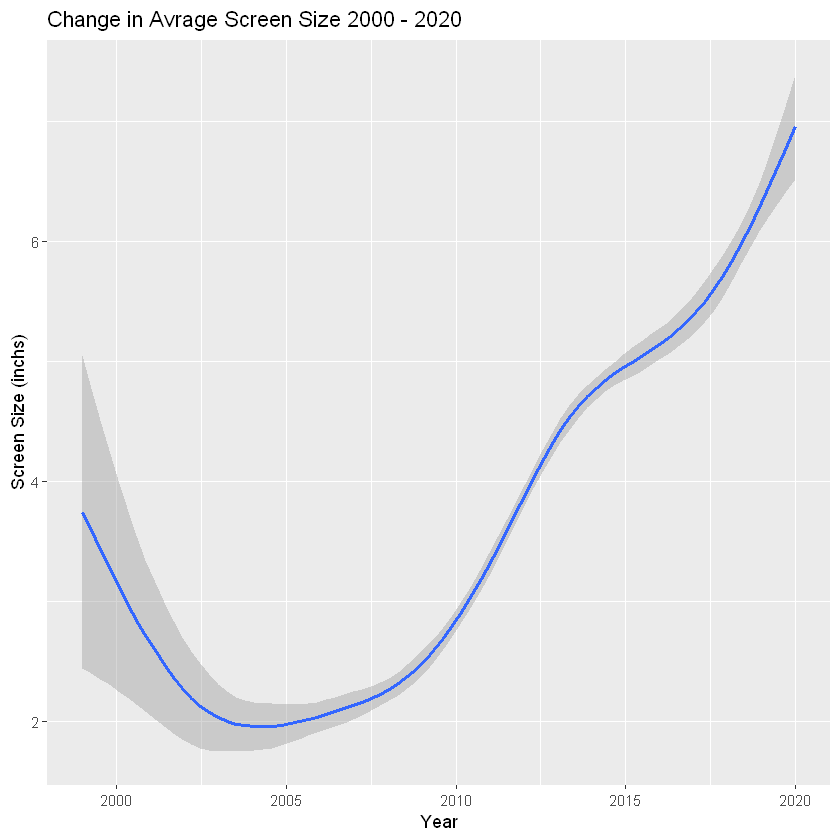

In [53]:
#we pip the df into ggplot, and set the parameters 
df_main %>% ggplot(mapping = aes(
x = year,y=as.numeric(display.size.y)))+
geom_smooth() + labs(x = "Year", y = "Screen Size (inchs)", title = 'Change in Avrage Screen Size 2000 - 2020')

2. Just like the screen size the screen to body ratio has been increasing since the keypads are gone. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 398 rows containing non-finite values (stat_smooth)."


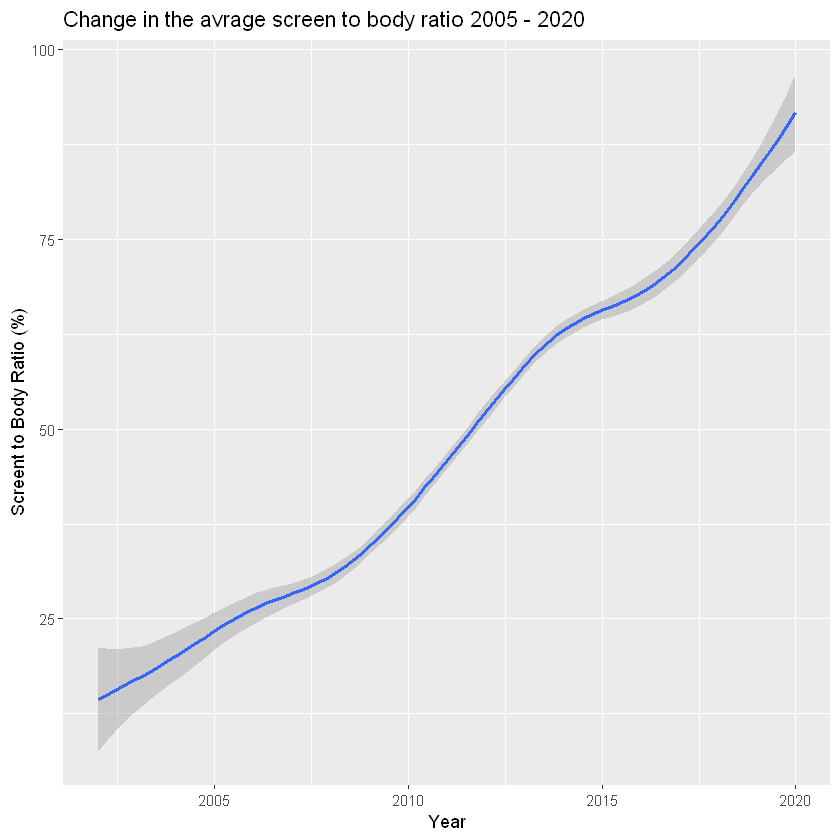

In [54]:
df_main %>% ggplot(mapping = aes(
x = year,y=as.numeric(Body_to_screen_ratio)))+
geom_smooth() + labs(x = "Year", y = "Screent to Body Ratio (%)", title = 'Change in the avrage screen to body ratio 2005 - 2020')

3. Some phone are ectremely expensive, like the Vertue (mage of gold) and hence these outlairs may effect the plot, so we filter them and plot the phone prices. 

Comparing the values over the years wont be fair hence we use the Consumer Price Index (CPI) to get the rigth values of the phones (in todays infaltion rate)

In [55]:
Phone_Prices <- df_main %>% filter(as.numeric(df_main$value) < 1000 )


Warning message:
"Removed 7 rows containing missing values (geom_point)."


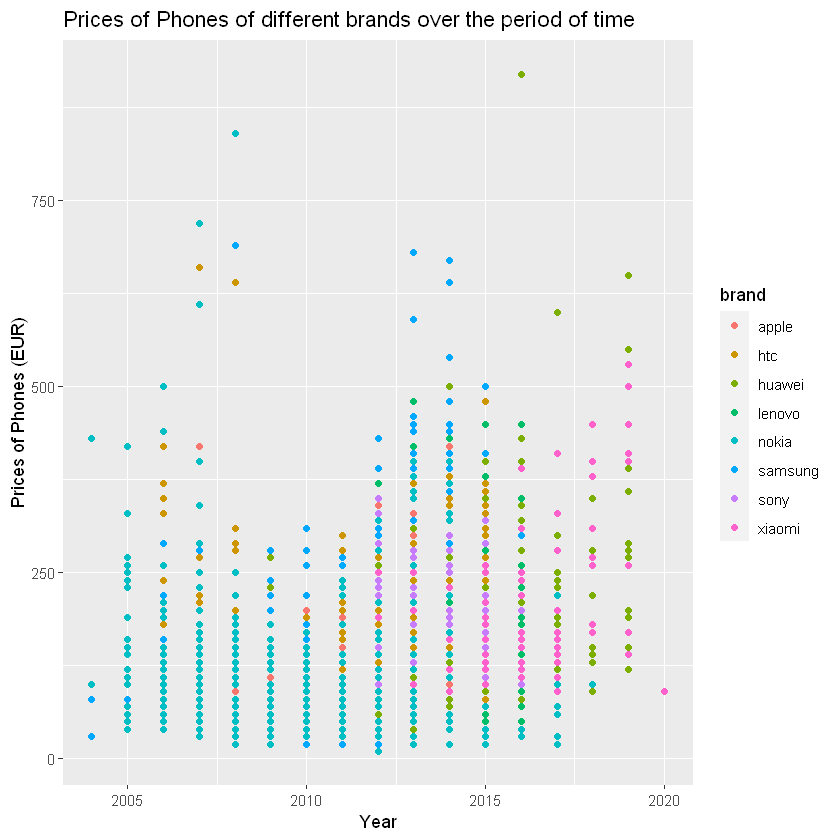

In [56]:
Phone_Prices %>% ggplot(mapping = aes(
x = year,y= as.numeric(value), 
                  color=brand))+
geom_point() + labs(x = "Year", y = "Prices of Phones (EUR)", title = 'Prices of Phones of different brands over the period of time')

In [57]:
Os <- df_main %>% group_by(OS)
Subs1 <- na.omit(Os)
Subs1

model,year,month,Weight_g,Screen,Back,Frame,Dispaly_size_inch,Body_to_screen_ratio,OS,...,Colors,value,currency,brand,display.size.y,screen_ratio,pixels,pixel_density,device_length,Battery_MAH
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Samsung Galaxy S6 Duos,2015,June,138,Glass front (Gorilla Glass 4),glass back (Gorilla Glass 4),aluminum frame,5.1,70.9,Android 5.0.2 (Lollipop),...,"White Pearl, Black Sapphire, Gold Platinum",400,EUR,samsung,5.1,70.9,1440 x 2560,576,71.7,2550
Samsung Galaxy J3 (2016),2016,March,138,Glass front (Asahi Dragontrail),plastic back,plastic frame,5.0,68.2,Android 5.1.1 (Lollipop) or Android 6.0 (Marshmallow),...,"White, Black, Gold",120,EUR,samsung,5.0,68.2,720 x 1280,294,68.9,2600
Samsung Galaxy Grand Prime,2014,September,156,Glass front,plastic back,plastic frame,5.0,66.0,Android 4.4.4 (KitKat),...,"White, Gray, Gold",140,EUR,samsung,5.0,66.0,540 x 960,220,68.9,2600
Samsung Galaxy A9 (2016),2015,December,200,Glass front (Gorilla Glass 4),glass back (Gorilla Glass 4),aluminum frame,6.0,75.9,Android 5.1.1 (Lollipop),...,"Pearl White, Midnight Black, Champagne Gold, Pink",200,EUR,samsung,6.0,75.9,1080 x 1920,367,99.2,4000
Samsung Galaxy S6 edge+ (USA),2015,August,153,Glass front (Gorilla Glass 4),glass back (Gorilla Glass 4),aluminum frame,5.7,76.5,Android 5.1.1 (Lollipop),...,"Black Sapphire, Gold Platinum",500,EUR,samsung,5.7,76.5,1440 x 2560,515,89.6,3000
Samsung Galaxy A3,2014,October,110.3,Glass front (Gorilla Glass 4),plastic back,aluminum frame,4.5,65.5,Android 4.4.4 (KitKat),...,"Pearl White, Midnight Black, Platinum Silver, Soft Pink, Light Blue, Champagne Gold",190,EUR,samsung,4.5,65.5,540 x 960,245,55.8,1900
Samsung I9500 Galaxy S4,2013,March,130,Glass front (Gorilla Glass 3),plastic back,plastic frame,5.0,72.3,Android 4.2.2 (Jelly Bean),...,"White Frost, Black Mist, Arctic Blue, Black Edition",320,EUR,samsung,5.0,72.3,1080 x 1920,441,68.9,2600
Samsung Galaxy J7,2015,June,171,Glass front,plastic back,plastic frame,5.5,69.6,Android 5.1 (Lollipop),...,"White, Black, Gold",200,EUR,samsung,5.5,69.6,720 x 1280,267,83.4,3000
Samsung Galaxy C5,2016,May,143,Glass front,aluminum back,aluminum frame,5.2,71.0,Android 6.0.1 (Marshmallow),...,"Gold, Pink Gold, Dark Gray",220,EUR,samsung,5.2,71.0,1080 x 1920,424,74.5,2600


In [58]:
os_max <- df_main %>% group_by(df_main$os) %>% distinct(.keep_all = TRUE) %>% count()

In [59]:
df_main %>% filter(as.numeric(df_main$value) >= 700 )

model,year,month,Weight_g,Screen,Back,Frame,Dispaly_size_inch,Body_to_screen_ratio,OS,...,Colors,value,currency,brand,display.size.y,screen_ratio,pixels,pixel_density,device_length,Battery_MAH
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Samsung Serenata,2007,October,136,NA,NA,NA,2.26,23.9,NA,...,Black,1000,EUR,samsung,2.26,23.9,240 x 240,150,16.5,1000
Huawei Mate X,2019,February,295,Plastic front,aluminum back,aluminum frame,8.0,86.9,Android 9.0 (Pie),...,Interstellar Blue,2150,EUR,huawei,8.0,86.9,2200 x 2480,414,205.0,4500
Huawei Mate 30 RS Porsche Design,2019,September,198,Glass front (Gorilla Glass 6),leather/glass back,aluminum frame,6.53,94.1,Android 10,...,"Black, Red",1700,EUR,huawei,6.53,94.1,1176 x 2400,409,108.7,4500
Huawei Mate 20 RS Porsche Design,2018,October,187,Glass front (Gorilla Glass),leather/glass back,aluminum frame,6.39,87.9,Android 9.0 (Pie),...,"Black, Red (China only)",1200,EUR,huawei,6.39,87.9,1440 x 3120,538,100.2,4200
Huawei Mate RS Porsche Design,2018,March,183,NA,NA,NA,6.0,83.5,Android 8.1 (Oreo),...,"Black, Red",1300,EUR,huawei,6.0,83.5,1440 x 2880,538,92.6,4000
Huawei Mate 9 Porsche Design,2016,November,169,Glass front (Gorilla Glass 3),aluminum back,aluminum frame,5.5,73.2,Android 7.0 (Nougat),...,Graphite Black,920,EUR,huawei,5.5,73.2,1440 x 2560,534,83.4,4000
Nokia 8800 Gold Arte,2008,December,150,NA,NA,NA,2.0,24.9,NA,...,Gold,1070,EUR,nokia,2.0,24.9,240 x 320,200,12.4,1000
Nokia 8 Sirocco,2018,February,177,Glass front (Gorilla Glass 5),glass back (Gorilla Glass 5),stainless steel frame,5.5,81.1,Android 8.0 (Oreo),...,Black,1010,EUR,nokia,5.5,81.1,1440 x 2560,534,83.4,3260
Nokia 8800 Carbon Arte,2008,August,150,NA,NA,NA,2.0,24.9,NA,...,Black,840,EUR,nokia,2.0,24.9,240 x 320,200,12.4,1000


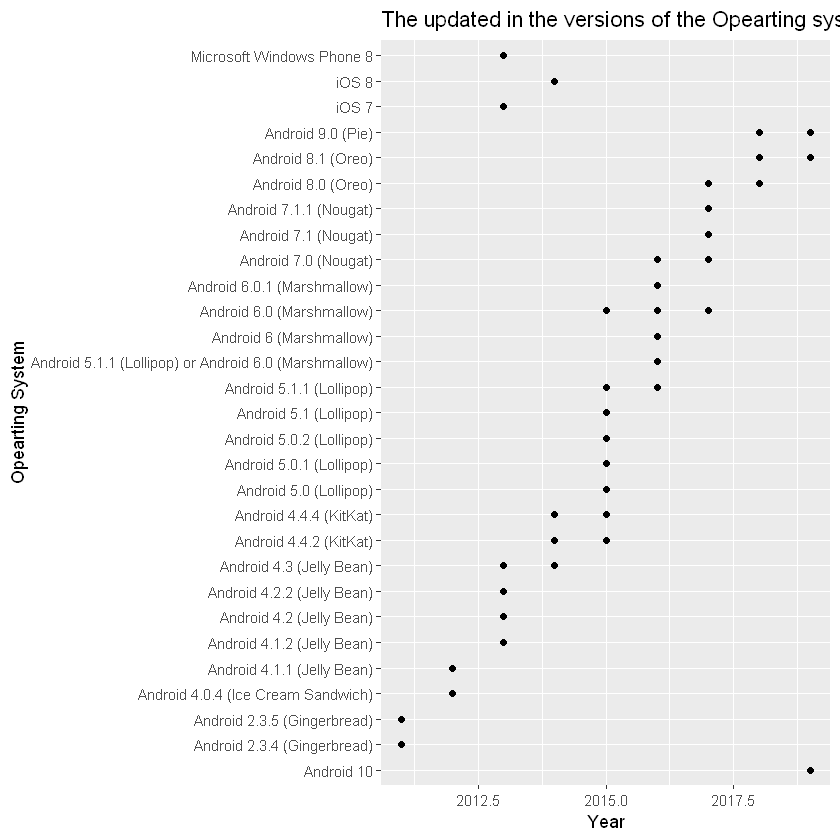

In [60]:
Subs1 %>% ggplot(mapping = aes(
x = year,y=OS))+
geom_point() + labs(x = "Year", y = "Opearting System", title = 'The updated in the versions of the Opearting systems 2014 - 2019')

In [61]:
write.csv(df_main ,"C:/Users/Chikz/Desktop/Wrangling Project/PHONE_DATASET/Phone_df.csv", row.names = FALSE)